# PyWBM ensemble soil moisture uncertainity quantification
- this code uses David Lafferty's huge soil moisture ensemble from ROAR Collab to quanitfy model and parametric uncertainity.
- This large soil moisture ensemble comes from his 2025 paper

### Inputs, Data Loading

In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import glob
import os
from linearmodels.panel import PanelOLS
import statsmodels.api as sm

## Uncertainity Testing

### Single Parameter Change

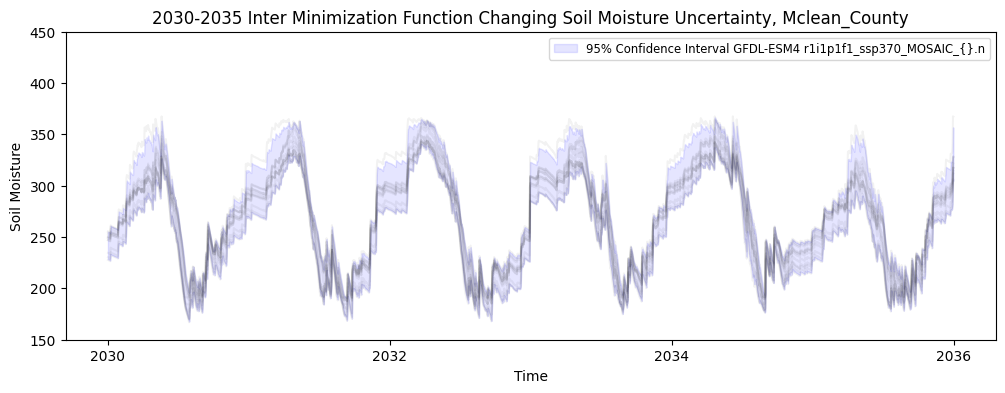

In [6]:
import os
import glob
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------------
# Configuration section
# Here we define our "fixed" and "variable" parameters.
# You can easily switch what’s fixed and what’s iterated over just by changing
# these definitions.
# ---------------------------------------------------------------------------

# Fixed parameters
fixed_model = "GFDL-ESM4"
fixed_directory = "/storage/group/pches/default/users/dcl5300/wbm_soilM_uc_2024_DATA/projections/eCONUS/out/LOCA2"
fixed_start_year = 2030
fixed_end_year = 2035

target_lon = -88.8647
target_lat = 40.5478
location = 'Mclean_County'

# Variable parameters

possible_dirs = ["SMAP", "VIC", "NOAH", "MOSAIC"]
possible_dirs = ["ssp245", "ssp370"]

possible_dirs = [
    "kge", "mae", "mse", "nse", "outer20rmse", "outer20ubrmse", "outer50rmse",
    "outer50ubrmse", "rmse", "taylor", "ubmae", "ubsme", "ubrmse"]

base_pattern = "*r1i1p1f1_ssp370_MOSAIC_{}.nc"  # one placeholder for sub_dir

# If you want to vary something else (like models), you could define a list of models:
# possible_models = ["GFDL-ESM4", "AnotherModel", "YetAnotherModel"]
# and keep sub_dir fixed by removing the loop over possible_dirs
# and adding a loop over possible_models, etc.

# ---------------------------------------------------------------------------
# Data Processing and Plotting
# ---------------------------------------------------------------------------

plt.figure(figsize=(12, 4))
ci_range = []

for sub_dir in possible_dirs:
    pattern = base_pattern.format(sub_dir)
    files = glob.glob(os.path.join(fixed_directory, pattern))
    
    if not files:
        continue

    for f in files:
        model_name = os.path.basename(f).split("_")[0]

        if model_name == fixed_model:
            ds = xr.open_dataset(f)
            ds_small = ds.sel(time=slice(f"{fixed_start_year}-01-01", f"{fixed_end_year}-12-31"))

            subset = ds_small.sel(lon=target_lon, method='nearest').sel(lat=target_lat, method='nearest')
            ci_range.append(subset.soilMoist.values)

            subset.soilMoist.plot(alpha=0.05, color='black')

            ds.close()
            del ds_small

# Once we have gone through all files (for all sub_dirs for the fixed model)
# we can compute the uncertainty range
time_values = subset['time'].values
ci_95th = np.percentile(ci_range, 97.5, axis=0)
ci_5th = np.percentile(ci_range, 2.5, axis=0)

plt.fill_between(
    time_values, 
    ci_5th, 
    ci_95th, 
    color='b', 
    alpha=.1, 
    label=f'95% Confidence Interval {fixed_model} {base_pattern[1:-1]}'
)

plt.title(f"{fixed_start_year}-{fixed_end_year} Inter Minimization Function Changing Soil Moisture Uncertainty, {location}")
plt.xlabel("Time")
plt.ylabel("Soil Moisture")
plt.ylim(150, 450)
plt.legend(fontsize='small', loc='upper right')

# Uncomment to save the figure if desired
base_path = "/storage/home/cta5244/work/0_soilmoisture/0_uncertainity_figures/"
plt.savefig(base_path + (f'1_soil_moist_model_{fixed_model}_{base_pattern[1:-1]}_{fixed_start_year}_{fixed_end_year}_{location}.png').replace("{", "-").replace("}", "-"))

#plt.show()


#### Single Parameter Change (ssp change)

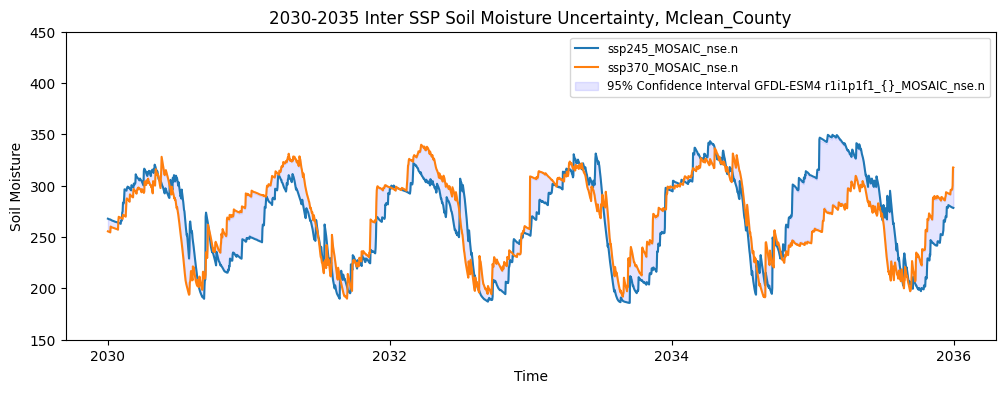

In [1]:
import os
import glob
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------------
# Configuration section
# Here we define our "fixed" and "variable" parameters.
# You can easily switch what’s fixed and what’s iterated over just by changing
# these definitions.
# ---------------------------------------------------------------------------

# Fixed parameters
fixed_model = "GFDL-ESM4"
fixed_directory = "/storage/group/pches/default/users/dcl5300/wbm_soilM_uc_2024_DATA/projections/eCONUS/out/LOCA2"
fixed_start_year = 2030
fixed_end_year = 2035

target_lon = -88.8647
target_lat = 40.5478
location = 'Mclean_County'

# Variable parameters
possible_dirs = [
    "kge", "mae", "mse", "nse", "outer20rmse", "outer20ubrmse", "outer50rmse",
    "outer50ubrmse", "rmse", "taylor", "ubmae", "ubsme", "ubrmse"]

possible_dirs = ["SMAP", "VIC", "NOAH", "MOSAIC"]
possible_dirs = ["ssp245", "ssp370"]

base_pattern = "*r1i1p1f1_{}_MOSAIC_nse.nc"  # one placeholder for sub_dir

# If you want to vary something else (like models), you could define a list of models:
# possible_models = ["GFDL-ESM4", "AnotherModel", "YetAnotherModel"]
# and keep sub_dir fixed by removing the loop over possible_dirs
# and adding a loop over possible_models, etc.

# ---------------------------------------------------------------------------
# Data Processing and Plotting
# ---------------------------------------------------------------------------

plt.figure(figsize=(12, 4))
ci_range = []

for sub_dir in possible_dirs:
    pattern = base_pattern.format(sub_dir)
    files = glob.glob(os.path.join(fixed_directory, pattern))
    
    if not files:
        continue

    for f in files:
        model_name = os.path.basename(f).split("_")[0]

        if model_name == fixed_model:
            ds = xr.open_dataset(f)
            ds_small = ds.sel(time=slice(f"{fixed_start_year}-01-01", f"{fixed_end_year}-12-31"))

            subset = ds_small.sel(lon=target_lon, method='nearest').sel(lat=target_lat, method='nearest')
            ci_range.append(subset.soilMoist.values)

            subset.soilMoist.plot(alpha=1, label=f[-20:-1])

            ds.close()
            del ds_small

# Once we have gone through all files (for all sub_dirs for the fixed model)
# we can compute the uncertainty range
time_values = subset['time'].values
ci_95th = np.percentile(ci_range, 97.5, axis=0)
ci_5th = np.percentile(ci_range, 2.5, axis=0)

plt.fill_between(
    time_values, 
    ci_5th, 
    ci_95th, 
    color='b', 
    alpha=.1, 
    label=f'95% Confidence Interval {fixed_model} {base_pattern[1:-1]}'
)

plt.title(f"{fixed_start_year}-{fixed_end_year} Inter SSP Soil Moisture Uncertainty, {location}")
plt.xlabel("Time")
plt.ylabel("Soil Moisture")
plt.ylim(150, 450)
plt.legend(fontsize='small', loc='upper right')

# Uncomment to save the figure if desired
base_path = "/storage/home/cta5244/work/0_soilmoisture/0_uncertainity_figures/"
#plt.savefig(base_path + (f'1_soil_moist_model_{fixed_model}_{base_pattern[1:-1]}_{fixed_start_year}_{fixed_end_year}_{location}.png').replace("{", "-").replace("}", "-"))

#plt.show()


### Double Parameter Change

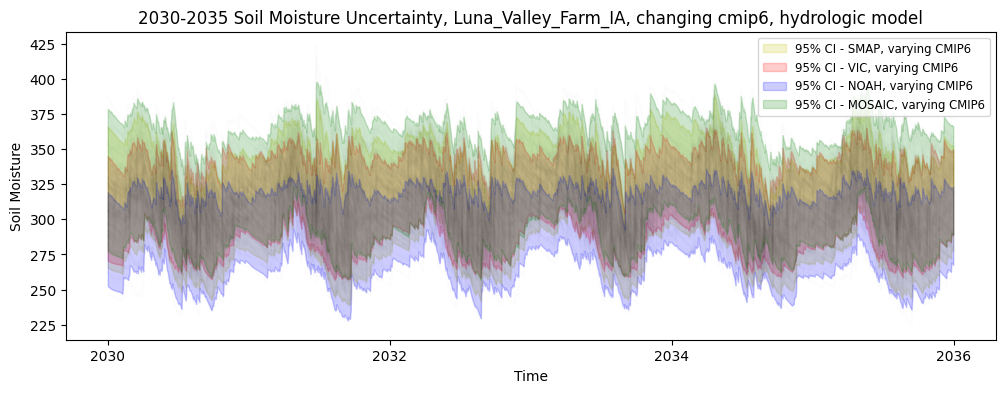

In [34]:
import glob
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------------
# Configuration section
# ---------------------------------------------------------------------------

base_directory = "/storage/group/pches/default/users/dcl5300/wbm_soilM_uc_2024_DATA/projections/eCONUS/out/LOCA2"

# Time slice of interest
fixed_start_year = 2030
fixed_end_year = 2035

# Location of interest
target_lon = -91.722259
target_lat = 43.349354
location = 'Luna_Valley_Farm_IA'

# Possible hydrologic models and climate models
possible_hydro_models = ["SMAP", "VIC", "NOAH", "MOSAIC"]

# An example set of climate models (replace with your actual list of 18 climate models)
possible_climate_models = ["ACCESS-CM2", "ACCESS-ESM1-5", "AWI-CM-1-1-MR", "BCC-CSM2-MR", "CanESM5", "EC-Earth3-Veg", 
                          "EC-Earth3", "FGOALS-g3", "GFDL-ESM4", "INM-CM4-8", "INM-CM5-0", "KACE-1-0-G", "MIROC6", 
                          "MRI-ESM2", "NorESM2-LM", "NorESM2-MM", "TaiESM1"]

# If you have a particular scenario or experiment pattern, specify it here.
# For instance, if you have ssp370 scenario only:
scenario = "ssp370"

# The file pattern might need to be adjusted. 
# Let's assume your files follow a pattern like:
# {climate_model}_r1i1p1f1_{scenario}_{hydro_model}_nse.nc
base_pattern = "{climate_model}_r1i1p1f1_{scenario}_{hydro_model}_nse.nc"
colors = ['y', 'r', 'b', 'g']
# ---------------------------------------------------------------------------
# Data Processing and Plotting
# ---------------------------------------------------------------------------

# Set output directory for figures
output_dir = "/storage/home/cta5244/work/0_soilmoisture/0_uncertainity_figures/"
os.makedirs(output_dir, exist_ok=True)
plt.figure(figsize=(12, 4))
for i, hydro_model in enumerate(possible_hydro_models):
    # For each hydrologic model, we want to aggregate data from all climate models
    ci_range = []
    time_values = None

    for climate_model in possible_climate_models:
        pattern = base_pattern.format(
            climate_model=climate_model,
            scenario=scenario,
            hydro_model=hydro_model
        )

        files = glob.glob(os.path.join(base_directory, pattern))
        
        if not files:
            continue

        for f in files:
            ds = xr.open_dataset(f)
            ds_small = ds.sel(time=slice(f"{start_year}-01-01", f"{end_year}-12-31"))
            
            # Select nearest grid cell to target location
            subset = ds_small.sel(lon=target_lon, method='nearest').sel(lat=target_lat, method='nearest')

            # Store the soil moisture values for CI calculations
            ci_range.append(subset.soilMoist.values)

            # Optionally plot each realization with low alpha for visual spread
            subset.soilMoist.plot(alpha=0.01, color='black')

            ds.close()

            # Grab time values from the last processed file (assuming all match)
            time_values = subset['time'].values

    # Compute the confidence intervals if we have data
    if ci_range:
        ci_range_array = np.array(ci_range)
        ci_95th = np.percentile(ci_range_array, 97.5, axis=0)
        ci_5th = np.percentile(ci_range_array, 2.5, axis=0)

        plt.fill_between(
            time_values, 
            ci_5th, 
            ci_95th,
            color=colors[i],
            alpha=.2, 
            label=f'95% CI - {hydro_model}, varying CMIP6'
        )

        plt.title(f"{start_year}-{end_year} Soil Moisture Uncertainty, {location}, changing cmip6, hydrologic model")
        plt.xlabel("Time")
        plt.ylabel("Soil Moisture")
        #plt.ylim(100, 150)
        plt.legend(fontsize='small', loc='upper right')

        # Save figure for this hydrologic model
        base_path = "/storage/home/cta5244/work/0_soilmoisture/0_uncertainity_figures/"
        plt.savefig(base_path + (f'1_soil_moist_model_{base_pattern[1:-3]}_{fixed_start_year}_{fixed_end_year}_{location}.png').replace("{", "-").replace("}", "-"))

    else:
        # If we have no data for this hydromodel and scenario, just close the figure
        plt.close()


### Trend in Soil Moisture

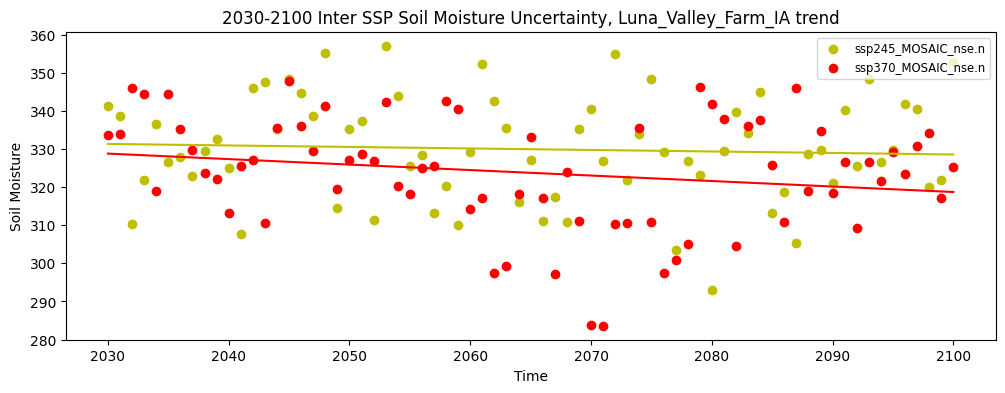

In [13]:
import os
import glob
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------------
# Configuration section
# Here we define our "fixed" and "variable" parameters.
# You can easily switch what’s fixed and what’s iterated over just by changing
# these definitions.
# ---------------------------------------------------------------------------

# Fixed parameters
fixed_model = "GFDL-ESM4"
fixed_directory = "/storage/group/pches/default/users/dcl5300/wbm_soilM_uc_2024_DATA/projections/eCONUS/out/LOCA2"
fixed_start_year = 2030
fixed_end_year = 2100
fixed_years = np.arange(fixed_start_year, fixed_end_year + 1)

target_lon = -91.722259
target_lat = 43.349354
location = 'Luna_Valley_Farm_IA'

# Variable parameters
possible_dirs = [
    "kge", "mae", "mse", "nse", "outer20rmse", "outer20ubrmse", "outer50rmse",
    "outer50ubrmse", "rmse", "taylor", "ubmae", "ubsme", "ubrmse"]

possible_dirs = ["SMAP", "VIC", "NOAH", "MOSAIC"]
possible_dirs = ["ssp245", "ssp370"]

base_pattern = "*r1i1p1f1_{}_MOSAIC_nse.nc"  # one placeholder for sub_dir
colors = ['y', 'r', 'b', 'g']

# If you want to vary something else (like models), you could define a list of models:
# possible_models = ["GFDL-ESM4", "AnotherModel", "YetAnotherModel"]
# and keep sub_dir fixed by removing the loop over possible_dirs
# and adding a loop over possible_models, etc.

# ---------------------------------------------------------------------------
# Data Processing and Plotting
# ---------------------------------------------------------------------------

plt.figure(figsize=(12, 4))
ci_range = []

for idx, sub_dir in enumerate(possible_dirs):
    pattern = base_pattern.format(sub_dir)
    files = glob.glob(os.path.join(fixed_directory, pattern))
    
    if not files:
        continue

    for f in files:
        model_name = os.path.basename(f).split("_")[0]

        if model_name == fixed_model:
            ds = xr.open_dataset(f)
            ds_small = ds.sel(time=slice(f"{fixed_start_year}-01-01", f"{fixed_end_year}-12-31"))

            subset = ds_small.sel(lon=target_lon, method='nearest').sel(lat=target_lat, method='nearest')
            ci_range.append(subset.soilMoist.values)
            yearly_data = subset.groupby("time.year").mean().soilMoist
            years = yearly_data["year"].values  # Extract years
            values = yearly_data.values  # Extract corresponding values
            
            degree = 1  # Linear regression
            coefficients = np.polyfit(years, values, degree)
            slope, intercept = coefficients
            
            # Calculate regression line
            regression_line_fixed = np.polyval(coefficients, fixed_years)
            
            plt.plot(fixed_years, regression_line_fixed, color =colors[idx])
            plt.scatter(years, values, label=f[-20:-1], color =colors[idx])
            ds.close()
            
            del ds_small

# Once we have gone through all files (for all sub_dirs for the fixed model)
# we can compute the uncertainty range
ci_95th = np.percentile(ci_range, 97.5, axis=0)
ci_5th = np.percentile(ci_range, 2.5, axis=0)

# Plot Confidence Interval with Daily Time
'''plt.fill_between(
    subset.time.values,
    ci_5th,
    ci_95th,
    color="b",
    alpha=0.1,
    label=f"95% Confidence Interval {fixed_model}"
)
'''
plt.title(f"{fixed_start_year}-{fixed_end_year} Inter SSP Soil Moisture Uncertainty, {location} trend")
plt.xlabel("Time")
plt.ylabel("Soil Moisture")
#plt.ylim(150, 450)
plt.legend(fontsize='small', loc='upper right')

# Uncomment to save the figure if desired
base_path = "/storage/home/cta5244/work/0_soilmoisture/0_uncertainity_figures/"
plt.savefig(base_path + (f'1_soil_moist_model_{fixed_model}_{base_pattern[1:-1]}_{fixed_start_year}_{fixed_end_year}_{location}_yearlytrend.png').replace("{", "-").replace("}", "-"))

#plt.show()